In [ ]:
#Python 3.12.4
#Import libraries
from bs4 import BeautifulSoup
import pandas as pd

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
from selenium.webdriver.edge.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 

import pandas as pd
import time
import os

In [ ]:
#I save the directory of the webdriver I'm using, Microsoft Edge, for convenience
#C:\Users\Admin>cd "C:\Program Files\edgedriver_win64 (1)"
#C:\Program Files\edgedriver_win64>msedgedriver.exe --port=4567

In [5]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [ ]:
#Set up Edge driver
#Create a unique temporary user profile directory
temp_profile_dir = os.path.abspath("temp_edge_profile")

edge_options = Options()
edge_options.add_argument("--start-maximize") #maximize the window for visibility
edge_options.add_argument(f"--user-data-dir={temp_profile_dir}")

driver_path = "C:/Program Files/edgedriver_win64 (1)/msedgedriver.exe"
service = Service(executable_path=driver_path)

driver = webdriver.Edge(service=service, options=edge_options)

In [ ]:
#Open the IMDB Oppenheimer page
driver.get("https://www.imdb.com/title/tt15398776/reviews/?ref_=tt_ov_ql_2") #replace with any other movie review page
print("Title:", driver.title)

#You might need to MANUALLY accept cookies and data collection here, after loading the movie review page

Title: Oppenheimer (2023) - User reviews - IMDb


In [52]:
#Click all spoilers button in the 1st page
from selenium.webdriver.common.action_chains import ActionChains

#Wait for spoiler buttons to be present
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located(By.XPATH,'//button[@aria-label="Expand Spoiler"]')
    )
except:
    print("No spoiler buttons found within 10 seconds.")
    

#Find all spoiler buttons on the page
spoiler_buttons = driver.find_elements(By.XPATH, '//button[@aria-label="Expand Spoiler"]')

print(f"Found {len(spoiler_buttons)} spoiler button")

#Click each spoiler button with time in between
#To avoide rate-limited or missing buttons
for i, btn in enumerate(spoiler_buttons):
    try:
        #Scroll the button into view
        driver.execute_script("arguments[0].scrollIntoView({block: 'center'})",btn)
        time.sleep(0.3)
        ActionChains(driver).move_to_element(btn).click(btn).perform()
        print(f"Clicked spoiler button #{i+1}")
        time.sleep(0.3) #give time for the spoiler button to expand

    except Exception as e:
        print(f"Failed to click spoiler button #{i+1}: {e}")

No spoiler buttons found within 10 seconds.
Found 6 spoiler button
Clicked spoiler button #1
Clicked spoiler button #2
Clicked spoiler button #3
Clicked spoiler button #4
Clicked spoiler button #5
Clicked spoiler button #6


In [53]:
#Click "25 more" then search for all Spoiler button again

#Loop control
max_loops = 180
loop_count = 0
prev_review_count = 0

#Start the loop
while loop_count < max_loops:
    
    #Get current number of reviews loaded (articles):
    current_reviews = driver.find_elements(By.XPATH, '//article[contains(@class, "user-review-item")]')
    current_review_count = len(current_reviews)    
    
    #Break the loop if no further reviews are loading (prevent infinite scrolling)
    if current_review_count == prev_review_count:
        print(f"No new reviews loaded after loop {loop_count}. Breaking to avoid infinite loop.")
        break
    prev_review_count = current_review_count
    
    #Wait for "25 more" button to present
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(
                (By.XPATH,'//span[@class="ipc-see-more__text" and text()="25 more"]/ancestor::button')
            )
        )
    except:
        print("No '25 more' found within 10 seconds.")

    #Find "25 more" button
    more_button = driver.find_elements(By.XPATH, '//span[@class="ipc-see-more__text" and text()="25 more"]/ancestor::button')
    print(f"[Loop {loop_count+1}] found {len(more_button)} 25 more buttons")
    
    if not more_button:
        print("No more 25 more button to click. End loop.")
        break

    #Click the 25 more button
    try:
        #Scroll the button into view
        driver.execute_script("arguments[0].scrollIntoView({block: 'center'})",more_button[0])
        time.sleep(0.3)
        ActionChains(driver).move_to_element(more_button[0]).click(more_button[0]).perform()
        print(f"Clicked '25 more' button")
        time.sleep(0.5) #give time for the spoiler button to expand

    except Exception as e:
        print(f"Failed to click '25 more' button: {e}")
        break
    
    #Wait for new reviews to load
    time.sleep(5)
    
    #Wait for spoiler buttons to be present
    try:
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located(By.XPATH,'//button[@aria-label="Expand Spoiler"]')
        )
    except:
        print(f"[Loop {loop_count+1}] No spoiler buttons found within 10 seconds.")
        

    #Find all spoiler buttons on the page
    spoiler_buttons = driver.find_elements(By.XPATH, '//button[@aria-label="Expand Spoiler"]')
    print(f"[Loop {loop_count+1}] Found {len(spoiler_buttons)} spoiler button")

    #Click each spoiler button with time in between
    #To avoide rate-limited or missing buttons
    for i, btn in enumerate(spoiler_buttons):
        try:
            #Scroll the button into view
            driver.execute_script("arguments[0].scrollIntoView({block: 'center'})",btn)
            time.sleep(0.3)
            ActionChains(driver).move_to_element(btn).click(btn).perform()
            print(f"Clicked spoiler button #{i+1}")
            time.sleep(0.3) #give time for the spoiler button to expand

        except Exception as e:
            print(f"Failed to click spoiler button #{i+1}: {e}")
    
    loop_count += 1
    


[Loop 1] found 1 25 more buttons
Clicked '25 more' button
[Loop 1] No spoiler buttons found within 10 seconds.
[Loop 1] Found 6 spoiler button
Clicked spoiler button #1
Clicked spoiler button #2
Clicked spoiler button #3
Clicked spoiler button #4
Clicked spoiler button #5
Clicked spoiler button #6
[Loop 2] found 1 25 more buttons
Clicked '25 more' button
[Loop 2] No spoiler buttons found within 10 seconds.
[Loop 2] Found 5 spoiler button
Clicked spoiler button #1
Clicked spoiler button #2
Clicked spoiler button #3
Clicked spoiler button #4
Clicked spoiler button #5
[Loop 3] found 1 25 more buttons
Clicked '25 more' button
[Loop 3] No spoiler buttons found within 10 seconds.
[Loop 3] Found 5 spoiler button
Clicked spoiler button #1
Clicked spoiler button #2
Clicked spoiler button #3
Clicked spoiler button #4
Clicked spoiler button #5
[Loop 4] found 1 25 more buttons
Clicked '25 more' button
[Loop 4] No spoiler buttons found within 10 seconds.
[Loop 4] Found 5 spoiler button
Clicked spoi

In [54]:
current_reviews = driver.find_elements(By.XPATH, '//article[contains(@class, "user-review-item")]')
print(len(current_reviews))


4397


In [ ]:
#A function to clean the spaces in review text
import re

def clean_review_text(text):
    #Remove excessive line breaks and replace with a single space
    text = re.sub(r'\n+',' ', text)
    
    #Remove multiple spaces in a single line text
    text = re.sub(r'\s+',' ', text)
    
    #Strip leading/trailing whitespace
    return text.strip()

In [56]:
#After checking to get all correct info from the 1st review => Loop through all reviews in the 1st page, before loading All 
#review container = <article class="sc-571af6d2-1 hzjHJm user-review-item"><div class="ipc-list-card--border-speech ipc-list-card--hasActions ipc-list-card--base ipc-list-card sc-27c64f4e-0 cqGiPr" data-testid="review-card-parent"><div class="ipc-list-card__content"><div class="sc-27c64f4e-4 cHPYXS"><span aria-label="pdean-49132's rating: 8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--otherUserAlt review-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8</span><span class="ipc-rating-star--maxRating">/<!-- -->10</span></span></div><div class="sc-27c64f4e-5 edCLQz"><div class="ipc-title ipc-title--base ipc-title--title ipc-title--on-textPrimary sc-27c64f4e-7 lgxrns" data-testid="review-summary"><a href="/review/rw9205442/?ref_=tturv_perm_6" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">Is it just me ?<svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--chevron-right-inline ipc-icon--inline ipc-title-link ipc-title-link-chevron" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M5.622.631A2.153 2.153 0 0 0 5 2.147c0 .568.224 1.113.622 1.515l8.249 8.34-8.25 8.34a2.16 2.16 0 0 0-.548 2.07c.196.74.768 1.317 1.499 1.515a2.104 2.104 0 0 0 2.048-.555l9.758-9.866a2.153 2.153 0 0 0 0-3.03L8.62.61C7.812-.207 6.45-.207 5.622.63z"></path></svg></h3></a></div></div><div class="ipc-overflowText ipc-overflowText--listCard ipc-overflowText--height-long ipc-overflowText--long ipc-overflowText--click ipc-overflowText--base" role="button" data-testid="review-overflow"><button class="ipc-overflowText-overlay" tabindex="0" aria-label="See more" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--more-horiz ipc-overflowText-overlay__affordance" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M6 10c-1.1 0-2 .9-2 2s.9 2 2 2 2-.9 2-2-.9-2-2-2zm12 0c-1.1 0-2 .9-2 2s.9 2 2 2 2-.9 2-2-.9-2-2-2zm-6 0c-1.1 0-2 .9-2 2s.9 2 2 2 2-.9 2-2-.9-2-2-2z"></path></svg></button><div class="ipc-overflowText--children"><div class="ipc-html-content ipc-html-content--base" role="presentation"><div class="ipc-html-content-inner-div" role="presentation">Is it just me or did anyone else find this movie... I hate to say it... boring?. I know I know it's a piece of history and don't get me wrong it was a good movie but idk, going in the theater expecting something "Nolanesque" and it never came so I was kind of a disappointed. I was super excited going in the theater and leaving I was like ,yeah it was good buuuuttt. I guess I was expecting something like inception and or interstellar but those are fictional and I get that this is based off of a true story . I think everyone should watch this movie once and it was very eye opening but I won't ever endure the painful 3 hour movie experience again . It's a one and done movie and I do respect Oppenheimer. Extremely good acting with a boatload of good actors . I also do want to say that there was nothing very IMAX about the movie so you could go to a regular theater and be just fine . Also Emily Blunts ending scene was amazing . All in all I would go as far as to say it's the most boring Christopher Nolan movie but it is a very good movie let's leave it at that . I still give the movie an 8.</div></div></div></div></div><div class="ipc-list-card__actions"><div class="sc-27c64f4e-8 cYVxnL"><div class="ipc-voting"><div class="ipc-voting__transition-group"><button class="ipc-icon-button ipc-voting__icon ipc-voting__icon--up ipc-voting__icon--up--inactive up-vote-btn ipc-icon-button--base ipc-icon-button--onBase" title="Is helpful" tabindex="0" aria-label="Is helpful" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--thumb-up" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M13.12 2.06c.58-.59 1.52-.59 2.11-.01.36.36.51.87.41 1.37L14.69 8h5.65c2.15 0 3.6 2.2 2.76 4.18l-3.26 7.61C19.52 20.52 18.8 21 18 21H9c-1.1 0-2-.9-2-2V9.01c0-.53.21-1.04.58-1.41l5.54-5.54zM9.293 8.707A1 1 0 0 0 9 9.414V18a1 1 0 0 0 1 1h7.332a1 1 0 0 0 .924-.617c1.663-4.014 2.527-6.142 2.594-6.383.07-.253.12-.587.15-1v-.002A1 1 0 0 0 20 10h-8l1.34-5.34-4.047 4.047zM3 21c1.1 0 2-.9 2-2v-8c0-1.1-.9-2-2-2s-2 .9-2 2v8c0 1.1.9 2 2 2z"></path></svg></button></div><span class="ipc-voting__label"><span class="ipc-voting__label__text" title="Helpful" role="none">Helpful</span><span class="ipc-voting__dot-separator">•</span><span class="ipc-voting__label__count ipc-voting__label__count--up">2.1K</span></span><div class="ipc-voting__transition-group"><button class="ipc-icon-button ipc-voting__icon ipc-voting__icon--down ipc-voting__icon--down--inactive down-vote-btn ipc-icon-button--base ipc-icon-button--onBase" title="Is not helpful" tabindex="0" aria-label="Is not helpful" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--thumb-down" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M16.41 16.4l-5.53 5.54c-.58.59-1.52.59-2.11.01-.36-.36-.51-.87-.41-1.37L9.31 16H3.66c-2.15 0-3.6-2.2-2.75-4.18l3.26-7.61A1.99 1.99 0 0 1 6 3h8.99c1.1 0 2 .9 2 2v9.99c0 .53-.21 1.04-.58 1.41zm-1.703-1.107a1 1 0 0 0 .293-.707V6a1 1 0 0 0-1-1H6.66a1 1 0 0 0-.92.607c-1.667 3.902-2.53 5.981-2.586 6.236-.06.268-.11.606-.154 1.013V13a1 1 0 0 0 1 1h8l-1.077 4.293c-.153.527-.19.814-.11.86.08.046.281-.144.605-.571l3.29-3.29zM21 3c-1.1 0-2 .9-2 2v8c0 1.1.9 2 2 2s2-.9 2-2V5c0-1.1-.9-2-2-2z"></path></svg></button></div><span class="ipc-voting__label"><span class="ipc-voting__label__count ipc-voting__label__count--down">906</span></span></div></div><div data-testid="item-share-menu" class="sc-27c64f4e-9 NUXkq"><button data-testid="share-button" class="ipc-icon-button sharemenu-iconbutton ipc-icon-button--base ipc-icon-button--onBase" title="More options" tabindex="0" aria-label="More options" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--more-vert" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M12 8c1.1 0 2-.9 2-2s-.9-2-2-2-2 .9-2 2 .9 2 2 2zm0 2c-1.1 0-2 .9-2 2s.9 2 2 2 2-.9 2-2-.9-2-2-2zm0 6c-1.1 0-2 .9-2 2s.9 2 2 2 2-.9 2-2-.9-2-2-2z"></path></svg></button></div></div></div><div data-testid="reviews-author" class="sc-a64e3cc9-1 bFvZOY"><ul class="ipc-inline-list ipc-inline-list--show-dividers ipc-inline-list--inline base" role="presentation"><li role="presentation" class="ipc-inline-list__item"><a class="ipc-link ipc-link--base" tabindex="0" aria-disabled="false" data-testid="author-link" href="/user/ur107924257/?ref_=tturv_usr_6_t">pdean-49132</a></li><li role="presentation" class="ipc-inline-list__item review-date">Jul 21, 2023</li><li role="presentation" class="ipc-inline-list__item"><a class="ipc-link ipc-link--base" tabindex="0" aria-disabled="false" data-testid="permalink-link" href="/review/rw9205442/?ref_=tturv_perm_6">Permalink</a></li></ul></div></article>

#Create an empty array => loop through the array to extract the data from each review containter
#Append data fr each review container to the list

#Extract all review containers
all_reviews = driver.find_elements(By.XPATH, '//article[contains(@class, "user-review-item")]')

#Declare an empty list for all reviews in the 1st page
extracted_reviews = []

#Loop through all review containers and extract data
for review in all_reviews:
    try:
        review_text = review.find_element(By.CSS_SELECTOR, ".ipc-overflowText--children").text
    except:
        try:
            review_text = review.find_element(By.CSS_SELECTOR, ".ipc-html-content-inner-div").text
        except:
            try:
                review_text = review.find_element(By.CSS_SELECTOR, ".ipc-html-content").text
            except:
                review_text = ""
    review_text = clean_review_text(review_text)
            
    #Extract other review data
    try:
        title = review.find_element(By.XPATH, './/h3[contains(@class, "ipc-title__text")]').text
    except:
        title = ""
    try:
        review_date = review.find_element(By.XPATH, './/li[contains(@class, "review-date")]').text
    except:
        review_date = ""
    try:
        ratings = review.find_element(By.XPATH, './/span[contains(@class, "ipc-rating-star--rating")]').text
    except:
        ratings = ""
    try: 
        upvote = review.find_element(By.XPATH, './/span[contains(@class, "ipc-voting__label__count--up")]').text
    except:
        upvote = ""
    try:
        downvote = review.find_element(By.XPATH, './/span[contains(@class, "ipc-voting__label__count--down")]').text
    except:
        downvote = ""
    
    #Append to dictionary
    review = {"Title": title,
                "Review dates": review_date, 
                "Ratings": ratings,
                "Reviews": review_text,
                "Upvote": upvote, 
                "Downvote": downvote
    
}
    
    #Append the extract data from each review to the list
    extracted_reviews.append(review)  

    
#Print the list of all reviews
for i, rev in enumerate(extracted_reviews):
    print(f"{i}, {rev}\n")


0, {'Title': 'Murphy is exceptional', 'Review dates': 'Jul 19, 2023', 'Ratings': '9', 'Reviews': "You'll have to have your wits about you and your brain fully switched on watching Oppenheimer as it could easily get away from a nonattentive viewer. This is intelligent filmmaking which shows it's audience great respect. It fires dialogue packed with information at a relentless pace and jumps to very different times in Oppenheimer's life continuously through it's 3 hour runtime. There are visual clues to guide the viewer through these times but again you'll have to get to grips with these quite quickly. This relentlessness helps to express the urgency with which the US attacked it's chase for the atomic bomb before Germany could do the same. An absolute career best performance from (the consistenly brilliant) Cillian Murphy anchors the film. This is a nailed on Oscar performance. In fact the whole cast are fantastic (apart maybe for the sometimes overwrought Emily Blunt performance). RDJ 

In [58]:
#Export to csv
import csv
csv_file = "allreviews.csv"

with open(csv_file, mode="w", newline="", encoding="utf-8") as file:
    #write the headers
    writer = csv.DictWriter(file, fieldnames=["Title","Review dates","Ratings","Reviews","Upvote","Downvote"])
    writer.writeheader()
    
    #write the rows:
    writer.writerows(extracted_reviews)

In [4]:
#Clean dataset
df = pd.read_csv("D:/OneDrive/# Lancaster University/MSCI581 - Marketing Analytics/# Group CW 581/allreviews.csv")

In [ ]:
df.isna().sum()
#there are 77 reviews with blank ratings. these are ratings at the very final

Title            0
Review dates     0
Ratings         77
Reviews          0
Upvote           0
Downvote         0
dtype: int64

In [ ]:
#Investigate the n.a records further
df_na = df[df["Ratings"].isna()]
df_na
print(max(df_na["Review dates"]), min(df_na["Review dates"]))

Sep 27, 2023 Apr 8, 2024


In [ ]:
#Since Ratings are important for our analysis and there are just 77 cases of n.a ratings (1.75%) => We will remove these rows
#And proceed with the dataframe without the NAs
df_final = df[df["Ratings"].notna()]
len(df_final) #4320 reviews

df_final


Title  Review dates  \
0                                 Murphy is exceptional  Jul 19, 2023   
1     A challenging watch to be sure, but a worthwhi...  Jul 20, 2023   
2                                Quality but exhausting  Jul 21, 2023   
3                              And the Oscar goes to...  Jul 19, 2023   
4     A brilliantly layered examination of a man thr...  Jul 20, 2023   
...                                                 ...           ...   
4383                                       PLOPenheimer  Apr 20, 2025   
4384  Boring and deceiving, stay away from Biopic's ...  Aug 11, 2023   
4385  Confusing and frustrating; celebrity appearanc...  Apr 20, 2025   
4386  A Feature Film of a man Struggling with his Co...  Jul 31, 2023   
4387                    It's all relative, isn't it....   Dec 3, 2023   

      Ratings                                            Reviews Upvote  \
0         9.0  You'll have to have your wits about you and yo...   2.5K   
1         8.0  One of the most anticipated films of the year ...   1.4K   
2         7.0  I'm a big fan of Nolan's work so was really lo...   1.2K   
3        10.0  I'm still collecting my thoughts after experie...   1.4K   
4        10.0  "Oppenheimer" is a biographical thriller film ...   1.2K   
...       ...                                                ...    ...   
4383      1.0  Firstly, the movie is too long, we can all agr...      0   
4384      5.0  The trailers for this film leaned way too much...      0   
4385      3.0  Oppenheimer is a slow, boring, confusing mess ...      0   
4386      5.0  Christopher Nolan looks more like an indie dir...      0   
4387      5.0  ..but at 180 minutes this is definitely a long...      0   

      Downvote  
0          482  
1          369  
2          328  
3          401  
4          427  
...        ...  
4383         0  
4384         2  
4385         0  
4386         3  
4387         6  

[4320 rows x 6 columns]

In [10]:
import numpy as np
df_final['Upvote'].describe
#Replace K in Upvote with 000
#df_final["Upvote"] = df_final["Upvote"].replace(regex=['K'], value='')
#df_final['Upvote'] = df_final['Upvote'].astype(float)

#Multiply Upvote with decimal places (1.2, 2.5...) with 1000 and convert to integer
#df_final["Upvote"] = df_final["Upvote"].apply(lambda x: x*1000 if isinstance(x,float) and not x.is_integer() else x)
#df_final["Upvote"] = df_final["Upvote"].astype(int)
df_final



Title  Review dates  \
0                                 Murphy is exceptional  Jul 19, 2023   
1     A challenging watch to be sure, but a worthwhi...  Jul 20, 2023   
2                                Quality but exhausting  Jul 21, 2023   
3                              And the Oscar goes to...  Jul 19, 2023   
4     A brilliantly layered examination of a man thr...  Jul 20, 2023   
...                                                 ...           ...   
4383                                       PLOPenheimer  Apr 20, 2025   
4384  Boring and deceiving, stay away from Biopic's ...  Aug 11, 2023   
4385  Confusing and frustrating; celebrity appearanc...  Apr 20, 2025   
4386  A Feature Film of a man Struggling with his Co...  Jul 31, 2023   
4387                    It's all relative, isn't it....   Dec 3, 2023   

      Ratings                                            Reviews  Upvote  \
0         9.0  You'll have to have your wits about you and yo...    2500   
1         8.0  One of the most anticipated films of the year ...    1400   
2         7.0  I'm a big fan of Nolan's work so was really lo...    1200   
3        10.0  I'm still collecting my thoughts after experie...    1400   
4        10.0  "Oppenheimer" is a biographical thriller film ...    1200   
...       ...                                                ...     ...   
4383      1.0  Firstly, the movie is too long, we can all agr...       0   
4384      5.0  The trailers for this film leaned way too much...       0   
4385      3.0  Oppenheimer is a slow, boring, confusing mess ...       0   
4386      5.0  Christopher Nolan looks more like an indie dir...       0   
4387      5.0  ..but at 180 minutes this is definitely a long...       0   

      Downvote  
0          482  
1          369  
2          328  
3          401  
4          427  
...        ...  
4383         0  
4384         2  
4385         0  
4386         3  
4387         6  

[4320 rows x 6 columns]

In [ ]:
df_final['Upvote'].mean()
df_final['Upvote'].max()
df_final['Upvote'].min()
df_final['Upvote'].mode()

0    1.0
Name: Upvote, dtype: float64

In [14]:
df_final["Downvote"].mean()
df_final["Downvote"].max()
df_final["Downvote"].min()
df_final["Downvote"].mode()

0    3
Name: Downvote, dtype: int64

In [15]:
#Save data to csv
df_final.to_csv('allreviews_final.csv', index=False)

<Axes: xlabel='Ratings', ylabel='Count'>

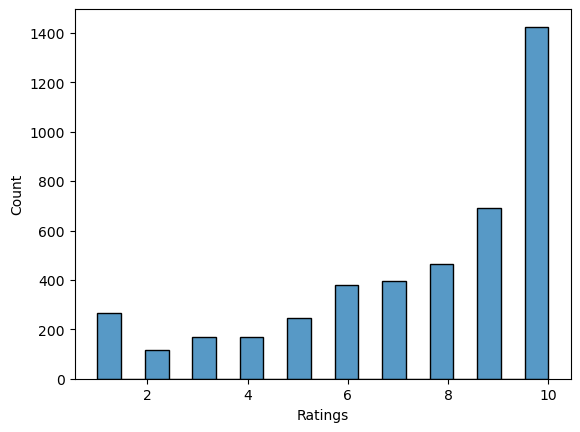

In [ ]:
#Exploratory data analysis & Data check
import matplotlib
import matplotlib.pyplot as plt
df_final["Ratings"].plot.hist
plt.show()

import seaborn as sns
sns.histplot(data = df_final, x="Ratings")